In [4]:
import pycaret
import pandas as pd

In [5]:
# อ่านไฟล์ CSV
data = pd.read_csv('export_data/filtered_data_3_best.csv')

In [6]:
# ตั้ง 'timestamp' เป็น index หากยังไม่ได้ทำ
data['timestamp'] = pd.to_datetime(data['timestamp'])
data.set_index('timestamp', inplace=True)

# ตั้งค่า freq ให้กับ index
data = data.asfreq('D')  # 'D' สำหรับรายวัน

In [7]:
# แสดงแถวที่มีค่าหายไปก่อนเติม
print("แถวที่มีค่าหายไปก่อนเติม:")
print(data[data.isnull().any(axis=1)])

# เติมค่าที่หายไปด้วยการ interpolate แบบเส้นตรง
data.interpolate(method='linear', inplace=True)

# แสดงแถวที่ยังมีค่า NaN หลังจากเติม (ถ้ามี)
missing_rows_after = data[data.isnull().any(axis=1)]
if not missing_rows_after.empty:
    print("แถวที่ยังมีค่าหายไปหลังเติม:")
    print(missing_rows_after)
else:
    print("ไม่มีค่าหายไปแล้ว")

row = data.loc["2023-09-30 07:00:00"]
row

แถวที่มีค่าหายไปก่อนเติม:
                     humidity  pm_10  pm_2_5  pm_2_5_sp  temperature
timestamp                                                           
2023-09-30 07:00:00       NaN    NaN     NaN        NaN          NaN
ไม่มีค่าหายไปแล้ว


humidity       82.889367
pm_10          60.525519
pm_2_5         53.415241
pm_2_5_sp      69.527667
temperature    29.219760
Name: 2023-09-30 07:00:00, dtype: float64

In [8]:
data = data['temperature']

<Axes: xlabel='timestamp'>

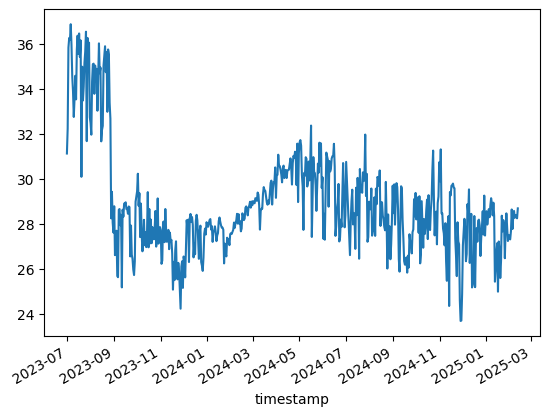

In [9]:
data.plot()

In [10]:
data_filtered = data.loc['2023-09':]  # ดึงข้อมูลตั้งแต่กันยายน 2023 เป็นต้นไป

<Axes: xlabel='timestamp'>

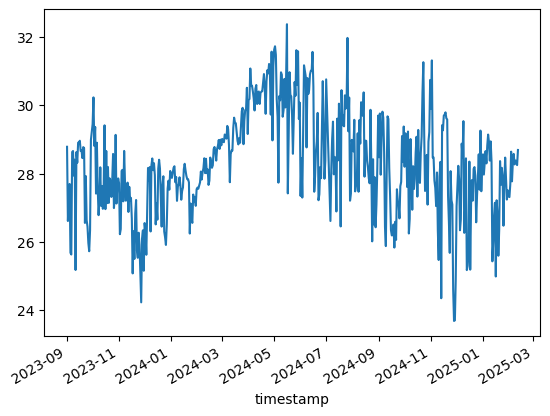

In [11]:
data_filtered.plot()

In [12]:
from pycaret.time_series import *
# ตั้งค่าของ PyCaret
s = setup(data=data_filtered, fh=30, session_id=123)

,Description,Value
0,session_id,123
1,Target,temperature
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(530, 1)"
5,Transformed data shape,"(530, 1)"
6,Transformed train set shape,"(500, 1)"
7,Transformed test set shape,"(30, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


In [13]:
# compare baseline models
best = compare_models()

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
grand_means,Grand Means Forecaster,0.8885,0.9617,1.2000,1.6099,0.0448,0.0434,-0.1940,0.6033
et_cds_dt,Extra Trees w/ Cond. Deseasonalize & Detrending,0.8944,0.9419,1.2050,1.5697,0.0445,0.0435,-0.0941,0.5333
rf_cds_dt,Random Forest w/ Cond. Deseasonalize & Detrending,0.9042,0.9557,1.2181,1.5929,0.0451,0.0440,-0.1277,0.6000
ada_cds_dt,AdaBoost w/ Cond. Deseasonalize & Detrending,0.9157,0.9181,1.2358,1.5326,0.0451,0.0447,-0.0565,0.3733
lightgbm_cds_dt,Light Gradient Boosting w/ Cond. Deseasonalize & Detrending,0.9310,0.9787,1.2558,1.6323,0.0465,0.0454,-0.1843,0.4600
croston,Croston,0.9367,0.9272,1.2676,1.5513,0.0460,0.0459,-0.1270,0.0100
auto_arima,Auto ARIMA,0.9510,0.9395,1.2870,1.5717,0.0465,0.0466,-0.1426,8.8600
gbr_cds_dt,Gradient Boosting w/ Cond. Deseasonalize & Detrending,0.9574,0.9837,1.2895,1.6377,0.0474,0.0466,-0.1900,0.4633
omp_cds_dt,Orthogonal Matching Pursuit w/ Cond. Deseasonalize & Detrending,0.9734,0.9830,1.3130,1.6395,0.0478,0.0475,-0.2035,0.3267
br_cds_dt,Bayesian Ridge w/ Cond. Deseasonalize & Detrending,0.9817,0.9680,1.3262,1.6164,0.0483,0.0479,-0.2116,0.3267


In [14]:
best = create_model('et_cds_dt')

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,2024-10-14,0.9299,1.0181,1.2138,1.6415,0.0433,0.0429,-0.1822
1,2024-11-13,1.2712,1.2807,1.7245,2.1398,0.0652,0.0630,-0.4088
2,2024-12-13,0.4822,0.5271,0.6769,0.9277,0.0249,0.0247,0.3086
Mean,NaT,0.8944,0.9419,1.2050,1.5697,0.0445,0.0435,-0.0941
SD,NaT,0.3231,0.3123,0.4277,0.4974,0.0165,0.0157,0.2994


In [15]:
plot_model(best, plot = 'forecast')

In [16]:
x = predict_model(best, fh = 30)
x

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,ExtraTreesRegressor,0.5741,0.5774,0.8223,1.0360,0.0306,0.0300,-0.2509


,y_pred
2025-01-13,27.6430
2025-01-14,27.8771
2025-01-15,28.4779
2025-01-16,27.7895
2025-01-17,28.2242
2025-01-18,27.9305
2025-01-19,27.5031
2025-01-20,27.9924
2025-01-21,28.0390
2025-01-22,28.5221


In [17]:
final_best = finalize_model(best)

In [23]:
x = predict_model(final_best, fh=60)
x

,y_pred
2025-02-12,28.0229
2025-02-13,27.8717
2025-02-14,28.2033
2025-02-15,28.0984
2025-02-16,27.7336
2025-02-17,27.8111
2025-02-18,27.8190
2025-02-19,28.0103
2025-02-20,28.3498
2025-02-21,28.5999


In [21]:
data.head()

timestamp
2023-07-01 07:00:00    31.131941
2023-07-02 07:00:00    32.240924
2023-07-03 07:00:00    35.841610
2023-07-04 07:00:00    36.269393
2023-07-05 07:00:00    36.176134
Freq: D, Name: temperature, dtype: float64

In [22]:
# save pipeline
save_model(best, 'temp_eng2')

Transformation Pipeline and Model Successfully Saved


(ForecastingPipeline(steps=[('forecaster',
                             TransformedTargetForecaster(steps=[('model',
                                                                 BaseCdsDtForecaster(fe_target_rr=[WindowSummarizer(lag_feature={'lag': [37,
                                                                                                                                         36,
                                                                                                                                         35,
                                                                                                                                         34,
                                                                                                                                         33,
                                                                                                                                         32,
                                     